<a href="https://colab.research.google.com/github/Monsterglitch/ML-NN-Collab/blob/main/ML_Worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPERVISED LEARNING**

In [ ]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


In [ ]:
# loading dependencies
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# **DATA VISUALISATION**

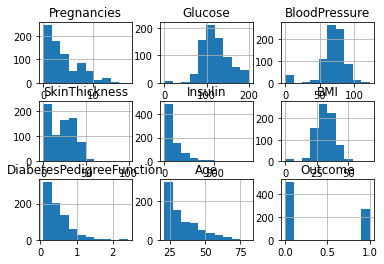

In [ ]:
data.hist()
pyplot.show() # histogram

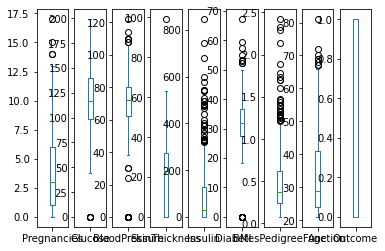

In [ ]:
data.plot(kind='box', subplots=True, sharex=False, sharey=False)
pyplot.show() # box & whisker plots

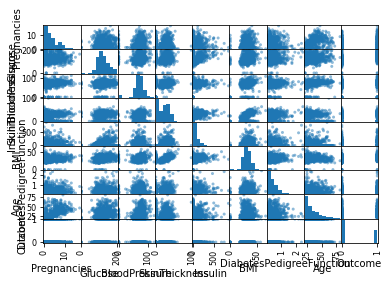

In [ ]:
scatter_matrix(data)
pyplot.show() # scatter plot

# **TRAIN & TEST SPLIT**

In [ ]:
array = data.values
x = array[:,0:4]
y = array[:,4]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.20, random_state=1) # the value of x_train remains same for that particular seed
# data is split into train and validation sets to eval the models in order to perform model selection

In [ ]:
print(x_train.shape, x_validation.shape)
print(y_train.shape, y_validation.shape) # size of train sets

(614, 4) (154, 4)
(614,) (154,)


# **USING VARIOUS ALGORITHMS**

In [ ]:
# With Cross Validation
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# WITH CROSS VALIDATION Logistic Regression is the best fit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


LR: 0.490228 (0.001629)
LDA: 0.483713 (0.004886)
KNN: 0.464169 (0.011401)
CART: 0.369707 (0.011401)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


NB: 0.439739 (0.003257)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


SVM: 0.498371 (0.000000)


In [ ]:
classifier = SVC()
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_validation)
print(accuracy_score(y_validation, prediction))

0.44155844155844154


In [ ]:
classifier = LinearDiscriminantAnalysis()
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_validation)
print(accuracy_score(y_validation, prediction))

0.42207792207792205


In [ ]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_validation)
print(accuracy_score(y_validation, prediction))

0.38961038961038963


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_validation)
print(accuracy_score(y_validation, prediction))

0.4025974025974026


In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_validation)
print(accuracy_score(y_validation, prediction))

0.2792207792207792


In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_validation)
print(accuracy_score(y_validation, prediction))

0.38311688311688313


In [ ]:
# WITHOUT CROSS-VALIDATION ON THE BASIS OF ACCURACY_SCORE SVC IS THE BEST FIT